In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# get points
areaPercentPolygon = np.loadtxt('../tda/debug/table_polygon.csv', delimiter=',')
areaPercentPolygon

array([[0.03895232, 0.04942966],
       [0.26393553, 0.05418251],
       [0.26192075, 0.25522814],
       [0.03693754, 0.25142586]])

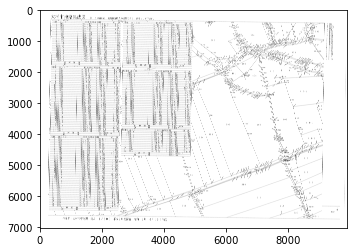

In [3]:
# load image
img = cv2.imread('20200619173238005.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)

In [4]:
# reconstruct correct coordinates
h, w, _ = img.shape
areaPolygon = areaPercentPolygon.copy()
areaPolygon[:, 0] *= w
areaPolygon[:, 1] *= h
areaPolygon = areaPolygon.astype(np.float32)
areaPolygon

array([[ 386.7186,  346.7985],
       [2620.3518,  380.1445],
       [2600.349 , 1790.6807],
       [ 366.7159, 1764.0038]], dtype=float32)

In [5]:
def sort_clockwise(a):
    """
    Sort corners points (x1, y1, x2, y2, ... clockwise from topleft), shape = (*, 2)
    :ref https://gist.github.com/flashlib/e8261539915426866ae910d55a3f9959
    :param a: ndarray, shape is (points nums, 2=(x,y))
    :return a: ndarray, shape is (points nums... clockwise from topleft, 2=(x,y))
    """

    # get centroids, shape=(1,2=(cx,cy))
    center = a.mean(axis=0).reshape((1, 2))

    sorted_inds = np.argsort(np.arctan2(a[:, 1]-center[:, 1], a[:, 0]-center[:, 0]))

    return np.take(a, sorted_inds, axis=0)

np.savetxt('../tda/debug/table_polygon.csv', sort_clockwise(areaPercentPolygon), delimiter=',')
np.loadtxt('../tda/debug/table_polygon.csv', delimiter=',')

array([[0.03895232, 0.04942966],
       [0.26393553, 0.05418251],
       [0.26192075, 0.25522814],
       [0.03693754, 0.25142586]])

In [6]:
# get maximum height and width
tl, tr, br, bl = areaPolygon
hmax = int(max((bl - tl)[1], (br - tr)[1]))
wmax = int(max((tr - tl)[0], (br - bl)[0]))
hmax, wmax


(1417, 2233)

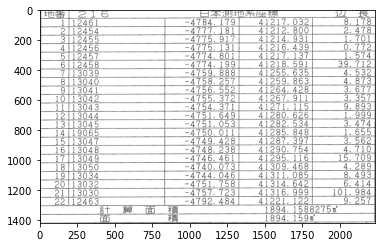

In [7]:
# affine transform
src = np.vstack((tl, tr, bl))
dst = np.array(((0,0), (wmax,0), (0,hmax)), dtype=np.float32)
warp_mat = cv2.getAffineTransform(src, dst)
img_cropped = cv2.warpAffine(img, warp_mat, (wmax, hmax))
plt.figure()
plt.imshow(img_cropped)

In [9]:
imgpath = '/Users/kado/Documents/measure-dataset/20200619173238005.tif'

areaPoly = np.vstack((tl, tr, br, bl)).flatten().astype(int)
filename, ext = os.path.splitext(os.path.basename(imgpath))
apex = '_tlx{}tly{}trx{}try{}brx{}bry{}blx{}bly{}'.format(*areaPoly)
savepath = os.path.abspath(os.path.join('..', 'tda', 'debug', filename + apex + '.jpg'))

cv2.imwrite(savepath, img_cropped)

True